<a href="https://colab.research.google.com/github/KumaranTCIN/DrunkDriving/blob/main/DrunkDriving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feature Extraction

In [10]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = "Alex_24_Intoxicated_1.wav"

In [3]:
ipd.Audio(file)

In [4]:
signal, sr = librosa.load(file)

In [5]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import librosa


def lin(sr, n_fft, n_filter=128, fmin=0.0, fmax=None, dtype=np.float32):

    if fmax is None:
        fmax = float(sr) / 2
    # Initialize the weights
    n_filter = int(n_filter)
    weights = np.zeros((n_filter, int(1 + n_fft // 2)), dtype=dtype)

    # Center freqs of each FFT bin
    fftfreqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

    # 'Center freqs' of liner bands - uniformly spaced between limits
    linear_f = np.linspace(fmin, fmax, n_filter + 2)

    fdiff = np.diff(linear_f)
    ramps = np.subtract.outer(linear_f, fftfreqs)

    for i in range(n_filter):
        # lower and upper slopes for all bins
        lower = -ramps[i] / fdiff[i]
        upper = ramps[i + 2] / fdiff[i + 1]

        # .. then intersect them with each other and zero
        weights[i] = np.maximum(0, np.minimum(lower, upper))

    return weights


def linear_spec(y=None,
                sr=22050,
                n_fft=2048,
                hop_length=512,
                win_length=None,
                window='hann',
                center=True,
                pad_mode='reflect',
                power=2.0,
                **kwargs):
    S = np.abs(
        librosa.core.stft(y=y,
                          n_fft=n_fft,
                          hop_length=hop_length,
                          win_length=win_length,
                          window=window,
                          center=center,
                          pad_mode=pad_mode))**power
    filter = lin(sr=sr, n_fft=n_fft, **kwargs)
    return np.dot(filter, S)


def lfcc(y=None,
         sr=22050,
         S=None,
         n_lfcc=20,
         dct_type=2,
         norm='ortho',
         **kwargs):
    if S is None:
        S = librosa.power_to_db(linear_spec(y=y, sr=sr, **kwargs))
    M = scipy.fftpack.dct(S, axis=0, type=dct_type, norm=norm)[:n_lfcc]
    return M

In [6]:
for files in folder:
  
lfccs = lfcc(y=signal, n_lfcc=16, sr=sr)

In [8]:
delta_lfccs = librosa.feature.delta(lfccs)

In [7]:
lfccs.shape

(16, 62)

In [9]:
delta_lfccs.shape

(16, 62)

In [14]:
enr = librosa.feature.rms(y = signal).flatten()

In [16]:
print(enr)

[0.         0.         0.00017249 0.00103887 0.00172342 0.00249012
 0.0031657  0.00367953 0.00406544 0.00479649 0.00740013 0.01155863
 0.01547067 0.01938566 0.02284425 0.02523235 0.02631069 0.02808939
 0.03034845 0.03205496 0.03238972 0.03367756 0.04037262 0.0488799
 0.05765363 0.06214973 0.06170058 0.05621938 0.0487509  0.04294144
 0.04317844 0.06046701 0.0718547  0.07896068 0.08313642 0.07581501
 0.06542762 0.05518274 0.04045371 0.02507208 0.01723538 0.01504417
 0.03125194 0.0496691  0.0622336  0.07247262 0.0820387  0.08684025
 0.09020884 0.08907226 0.08025821 0.06750873 0.05309283 0.04190738
 0.03252161 0.02561256 0.01981017 0.014753   0.01429226 0.0149852
 0.01499769 0.01603529]


In [15]:
enr.shape

(62,)

In [ ]:
log_rmse = numpy.log1p(10*rmse)
log_rmse_diff = numpy.zeros_like(log_rmse)
log_rmse_diff[1:] = numpy.diff(log_rmse)

hop_length = 512
frame_length = 1024
rmse = librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length).flatten()
rmse_diff = numpy.zeros_like(rmse)
rmse_diff[1:] = numpy.diff(rmse)

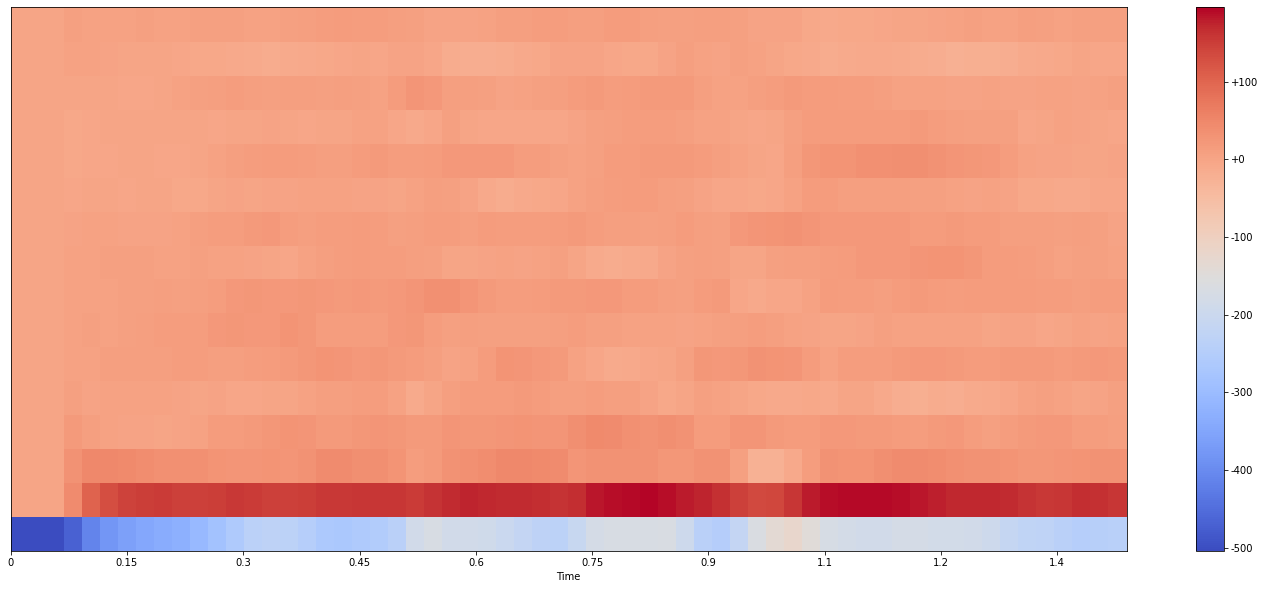

In [19]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(lfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

### trial

In [1]:
import scipy
from spafe.utils import vis
from spafe.features.lfcc import lfcc

# init input vars
num_ceps = 13
low_freq = 0
high_freq = 2000
nfilts = 24
nfft = 512
dct_type = 2,
use_energy = False,
lifter = 5
normalize = False
    
# read wav 
fs, sig = scipy.io.wavfile.read("Alex_24_Intoxicated_1.wav")

# compute features
lfccs = lfcc(sig=sig,
             fs=fs,
             num_ceps=num_ceps,
             nfilts=nfilts,
             nfft=nfft,
             low_freq=low_freq,
             high_freq=high_freq,
             dct_type=dct_type,
             use_energy=use_energy,
             lifter=lifter,
             normalize=normalize)

# visualize spectogram
vis.spectogram(sig, fs)
# visualize features
vis.visualize_features(lfccs, 'LFCC Index', 'Frame Index')

ModuleNotFoundError: ignored

## GMM-UBM model

In [ ]:
## gmm model
import numpy as np
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 1024, max_iter = 6, random_state = 42).fit(X)

top = gmm.weights_.sort(reverse = True)
req = top[:10]

In [ ]:
def MAPaDapt(ScpFileList,  m, v, w, Tau, MapItr, parameter): # only mean adaptation implemented
    #Douglas A. Reynolds, Thomas F. Quatieri, and Robert B. Dunn, "Speaker Verification Using Adapted Gaussian Mixture Models",Digital Signal Processing 10, 19-41 (2000)
    
    for iter in range(0, MapItr):

          #initialize
          ixx=(numpy.size(w))
          N_tot=numpy.zeros(ixx)
 
          ixx=(numpy.size(m, axis=0), numpy.size(w))
          F_tot, S_tot = numpy.zeros(ixx), numpy.zeros(ixx)
          frm_tot, llk_tot = 0, 0.0 #for average llk
          

          
          for file_ in  ScpFileList: # number of files
                
                data=htkread(file_)
                data=data.T  # dim x frames

                N, F, S, llk, n_frames =Collect_Stats(data,  m, v, w) #  for statistics
                print "MAP %d ...%s, frame %d  llh %f" %(iter, file_, n_frames, sum(llk)/len(llk))
                
                if (numpy.size(N, axis=0) == numpy.size(w) ) and (numpy.size(F, axis=0) == numpy.size(m, axis=0)): # avoid empty file     

                     N_tot, F_tot, S_tot = N_tot +  N, F_tot +  F, S_tot +  S
                     llk_tot, frm_tot = llk_tot + (sum(llk)/len(llk)), frm_tot + n_frames
                     

                else:
                     continue

           #all stat estimated above
          

          if parameter == 'Mean':
                alpha, mean_ml = N_tot/(N_tot + Tau), F_tot/N_tot # ml estimate 'mean'
                mu1, mu2=numpy.multiply(m, (1-alpha)), numpy.multiply(mean_ml, alpha)   
                m_new=mu1 + mu2

          else:
             print "code only support - mean adaptation!"
             print "config parameter has to be 'm' -program terminated!"
             exit()

          # replace the old UBM parameters with re-estimated one
          m=m_new
 
    return m, v, w


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import logsumexp
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt


def GMM_sklearn(x, weights=None, means=None, covariances=None):
    model = GaussianMixture(n_components=2,
                            covariance_type='full',
                            tol=0.01,
                            max_iter=1000,
                            weights_init=weights,
                            means_init=means,
                            precisions_init=covariances)
    model.fit(x)
    print("\nscikit learn:\n\tphi: %s\n\tmu_0: %s\n\tmu_1: %s\n\tsigma_0: %s\n\tsigma_1: %s"
               % (model.weights_[1], model.means_[0, :], model.means_[1, :], model.covariances_[0, :], model.covariances_[1, :]))
    return model.predict(x), model.predict_proba(x)[:,1]


def get_random_psd(n):
    x = np.random.normal(0, 1, size=(n, n))
    return np.dot(x, x.transpose())


def initialize_random_params():
    params = {'phi': np.random.uniform(0, 1),
              'mu0': np.random.normal(0, 1, size=(2,)),
              'mu1': np.random.normal(0, 1, size=(2,)),
              'sigma0': get_random_psd(2),
              'sigma1': get_random_psd(2)}
    return params


def learn_params(x_labeled, y_labeled):
    n = x_labeled.shape[0]
    phi = x_labeled[y_labeled == 1].shape[0] / n
    mu0 = np.sum(x_labeled[y_labeled == 0], axis=0) / x_labeled[y_labeled == 0].shape[0]
    mu1 = np.sum(x_labeled[y_labeled == 1], axis=0) / x_labeled[y_labeled == 1].shape[0]
    sigma0 = np.cov(x_labeled[y_labeled == 0].T, bias= True)
    sigma1 = np.cov(x_labeled[y_labeled == 1].T, bias=True)
    return {'phi': phi, 'mu0': mu0, 'mu1': mu1, 'sigma0': sigma0, 'sigma1': sigma1}


def e_step(x, params):
    np.log([stats.multivariate_normal(params["mu0"], params["sigma0"]).pdf(x),
            stats.multivariate_normal(params["mu1"], params["sigma1"]).pdf(x)])
    log_p_y_x = np.log([1-params["phi"], params["phi"]])[np.newaxis, ...] + \
                np.log([stats.multivariate_normal(params["mu0"], params["sigma0"]).pdf(x),
            stats.multivariate_normal(params["mu1"], params["sigma1"]).pdf(x)]).T
    log_p_y_x_norm = logsumexp(log_p_y_x, axis=1)
    return log_p_y_x_norm, np.exp(log_p_y_x - log_p_y_x_norm[..., np.newaxis])


def m_step(x, params):
    total_count = x.shape[0]
    _, heuristics = e_step(x, params)
    heuristic0 = heuristics[:, 0]
    heuristic1 = heuristics[:, 1]
    sum_heuristic1 = np.sum(heuristic1)
    sum_heuristic0 = np.sum(heuristic0)
    phi = (sum_heuristic1/total_count)
    mu0 = (heuristic0[..., np.newaxis].T.dot(x)/sum_heuristic0).flatten()
    mu1 = (heuristic1[..., np.newaxis].T.dot(x)/sum_heuristic1).flatten()
    diff0 = x - mu0
    sigma0 = diff0.T.dot(diff0 * heuristic0[..., np.newaxis]) / sum_heuristic0
    diff1 = x - mu1
    sigma1 = diff1.T.dot(diff1 * heuristic1[..., np.newaxis]) / sum_heuristic1
    params = {'phi': phi, 'mu0': mu0, 'mu1': mu1, 'sigma0': sigma0, 'sigma1': sigma1}
    return params


def get_avg_log_likelihood(x, params):
    loglikelihood, _ = e_step(x, params)
    return np.mean(loglikelihood)


def run_em(x, params):
    avg_loglikelihoods = []
    while True:
        avg_loglikelihood = get_avg_log_likelihood(x, params)
        avg_loglikelihoods.append(avg_loglikelihood)
        if len(avg_loglikelihoods) > 2 and abs(avg_loglikelihoods[-1] - avg_loglikelihoods[-2]) < 0.0001:
            break
        params = m_step(x_unlabeled, params)
    print("\tphi: %s\n\tmu_0: %s\n\tmu_1: %s\n\tsigma_0: %s\n\tsigma_1: %s"
               % (params['phi'], params['mu0'], params['mu1'], params['sigma0'], params['sigma1']))
    _, posterior = e_step(x_unlabeled, params)
    forecasts = np.argmax(posterior, axis=1)
    return forecasts, posterior, avg_loglikelihoods



# def semi_supervised_gmm(x_unlabeled):
#     data_labeled = pd.read_csv("data/labeled.csv")
#     x_labeled = data_labeled[["x1", "x2"]].values
#     y_labeled = data_labeled["y"].values
#     params = learn_params(x_labeled, y_labeled)
#     weights = [1 - params["phi"], params["phi"]]
#     means = [params["mu0"], params["mu1"]]
#     covariances = [params["sigma0"], params["sigma1"]]
#     sklearn_forecasts, posterior_sklearn = GMM_sklearn(x_unlabeled, weights, means, covariances)
#     forecasts, posterior, loglikelihoods = run_em(x_unlabeled, params)
#     print("total steps: ", len(loglikelihoods))
#     plt.plot(loglikelihoods)
#     plt.title("semi-supervised log likelihoods")
#     plt.savefig("semi-supervised.png")
#     return pd.DataFrame({'forecasts': forecasts, 'posterior': posterior[:, 1],
#                                  'sklearn_forecasts': sklearn_forecasts,
#                                  'posterior_sklearn': posterior_sklearn})



if __name__ == '__main__':
    data_unlabeled = pd.read_csv("data/unlabeled.csv")
    x_unlabeled = data_unlabeled[["x1", "x2"]].values

    # Unsupervised learning
    print("unsupervised: ")
    random_params = initialize_random_params()
    unsupervised_forecastsforecasts, unsupervised_posterior, unsupervised_loglikelihoods = run_em(x_unlabeled, random_params)
    print("total steps: ", len(unsupervised_loglikelihoods))
    plt.plot(unsupervised_loglikelihoods)
    plt.title("unsupervised log likelihoods")
    plt.savefig("unsupervised.png")
    plt.close()

    # Semi-supervised learning
    print("\nsemi-supervised: ")
    data_labeled = pd.read_csv("data/labeled.csv")
    x_labeled = data_labeled[["x1", "x2"]].values
    y_labeled = data_labeled["y"].values
    learned_params = learn_params(x_labeled, y_labeled)
    semisupervised_forecasts, semisupervised_posterior, semisupervised_loglikelihoods = run_em(x_unlabeled, learned_params)
    print("total steps: ", len(semisupervised_loglikelihoods))
    plt.plot(semisupervised_loglikelihoods)
    plt.title("semi-supervised log likelihoods")
    plt.savefig("semi-supervised.png")

    # Compare the forecats with Scikit-learn API
    learned_params = learn_params(x_labeled, y_labeled)
    weights = [1 - learned_params["phi"], learned_params["phi"]]
    means = [learned_params["mu0"], learned_params["mu1"]]
    covariances = [learned_params["sigma0"], learned_params["sigma1"]]
    sklearn_forecasts, posterior_sklearn = GMM_sklearn(x_unlabeled, weights, means, covariances)
    
    output_df = pd.DataFrame({'semisupervised_forecasts': semisupervised_forecasts,
                              'semisupervised_posterior': semisupervised_posterior[:, 1],
                              'sklearn_forecasts': sklearn_forecasts,
                              'posterior_sklearn': posterior_sklearn})

    print("\n%s%% of forecasts matched." % (output_df[output_df["semisupervised_forecasts"] == output_df["sklearn_forecasts"]].shape[0] /output_df.shape[0]